In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


In [3]:
# Load the dataset
data = pd.read_csv('game_data_all.csv', sep=',',
usecols=['game', 'release', 'peak_players', 'positive_reviews', 'negative_reviews', 'total_reviews', 'rating'])

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game              67571 non-null  object 
 1   release           67571 non-null  object 
 2   peak_players      67571 non-null  int64  
 3   positive_reviews  67571 non-null  int64  
 4   negative_reviews  67571 non-null  int64  
 5   total_reviews     67571 non-null  int64  
 6   rating            67571 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.6+ MB


In [5]:
data.describe()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating
count,6.757100e+04,6.757100e+04,67571.000000,6.757100e+04,67571.000000
mean,9.528674e+02,1.273527e+03,216.893801,1.490421e+03,65.288208
std,1.979093e+04,2.955163e+04,5434.959528,3.400923e+04,14.059623
min,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,15.090000
25%,3.000000e+00,5.000000e+00,1.000000,7.000000e+00,56.530000
50%,7.000000e+00,1.900000e+01,6.000000,2.600000e+01,66.760000
75%,4.600000e+01,9.900000e+01,29.000000,1.320000e+02,75.640000
max,3.257248e+06,6.307931e+06,927317.000000,7.117776e+06,97.540000


In [6]:
data

,game,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,Pizza Tower,2023-01-26,4529,19807,227,20034,96.39
1,Resident Evil 4,2023-03-24,168191,61752,1616,63368,95.75
2,The Murder of Sonic the Hedgehog,2023-03-31,15543,12643,213,12856,95.54
3,Pineapple on pizza,2023-03-28,1415,11717,209,11926,95.39
4,Hi-Fi RUSH,2023-01-25,6132,14152,324,14476,95.09
...,...,...,...,...,...,...,...
67566,Space Empires V,2006-10-16,137,290,120,410,67.34
67567,Iron Warriors: T-72 Tank Command,2006-07-26,15,173,104,277,60.17
67568,Gumboy: Crazy Adventures,2006-12-19,22,61,60,121,50.32
67569,Shattered Union,2006-10-25,13,71,70,141,50.27


In [7]:
# to detect missing values
data.isnull().sum()

game                0
release             0
peak_players        0
positive_reviews    0
negative_reviews    0
total_reviews       0
rating              0
dtype: int64

In [8]:
data.shape 

(67571, 7)

In [9]:
data.duplicated().sum()

1144

In [10]:
df = data.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
# Scale the features
scaler = RobustScaler()
df[['peak_players', 'positive_reviews', 'negative_reviews', 'total_reviews']] = scaler.fit_transform(df[['peak_players', 'positive_reviews', 'negative_reviews', 'total_reviews']])

C:\Users\Hp\AppData\Local\Temp\ipykernel_3324\1639945692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['peak_players', 'positive_reviews', 'negative_reviews', 'total_reviews']] = scaler.fit_transform(df[['peak_players', 'positive_reviews', 'negative_reviews', 'total_reviews']])


In [13]:
X = df.drop(['release', 'rating','game'], axis=1)
y = df['rating']

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [15]:
print(X_train.dtypes)

peak_players        float64
positive_reviews    float64
negative_reviews    float64
total_reviews       float64
dtype: object


In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((46498, 4), (46498,), (19929, 4), (19929,))

In [17]:
X_test.head()

,peak_players,positive_reviews,negative_reviews,total_reviews
14349,-0.113636,-0.178947,-0.142857,-0.174603
30813,0.090909,0.336842,0.321429,0.317460
19590,58.204545,22.610526,25.821429,22.777778
51080,-0.068182,-0.168421,0.107143,-0.111111
53016,0.113636,-0.010526,-0.142857,-0.047619


In [33]:
# Initialize the linear regression model
from sklearn.linear_model import LinearRegression
multiple_lr = LinearRegression()
# Fit the model
multiple_lr.fit(X_train, y_train)
# Make predictions
from sklearn.model_selection import cross_val_score, KFold
# Perform KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(multiple_lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
y_pred = multiple_lr.predict(X_test)

In [19]:
# Calculate the mean score
mean_score = -scores.mean()
print("Mean MSE:", mean_score)

Mean MSE: 200.120668528515


In [20]:
print('model using a linear regression ')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

test_score = r2_score(y_test, y_pred)

print('Model is overfitting' if mean_score > test_score else 'Model is not overfitting')

model using a linear regression 
MAE: 11.369413008078071
MSE: 197.78224656239834
R-squared: 0.00713109729395911
Model is overfitting


In [21]:
# DecisionTreeRegressor

In [22]:
Decision = DecisionTreeRegressor()

In [23]:
Decision.fit(X_train, y_train)
# Make predictions
from sklearn.model_selection import cross_val_score
# Perform KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation
Decision_scores = cross_val_score(Decision, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
Decision_y_pred = Decision.predict(X_test)

In [24]:
# Calculate the mean score
Decisionmean_score = -Decision_scores.mean()
print("Mean MSE:", Decisionmean_score)

Mean MSE: 0.369017385042916


In [25]:
print('model using Decision tree')
print(f'MAE: {mean_absolute_error(y_test, Decision_y_pred)}')
print(f'MSE: {mean_squared_error(y_test, Decision_y_pred)}')
print(f'R-squared: {r2_score(y_test, Decision_y_pred)}')
test_score = r2_score(y_test, Decision_y_pred)

print('Model is overfitting' if Decisionmean_score > test_score else 'Model is not overfitting')

model using Decision tree
MAE: 0.15251292086920676
MSE: 0.2701092127051031
R-squared: 0.9986440489867492
Model is not overfitting


In [26]:
# RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Make predictions
from sklearn.model_selection import cross_val_score
# Perform KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation
rf_scores = cross_val_score(rf_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_y_pred = rf_regressor.predict(X_test)

In [29]:
# Calculate the mean score
rf_mean_score = -rf_scores.mean()
print("Mean MSE:", rf_mean_score)

Mean MSE: 0.14376831636565318


In [30]:
print('model using Random Forest')
print(f'MAE: {mean_absolute_error(y_test, rf_y_pred)}')
print(f'MSE: {mean_squared_error(y_test, rf_y_pred)}')
print(f'R-squared: {r2_score(y_test, rf_y_pred)}')
test_score = r2_score(y_test, rf_y_pred)

print('Model is overfitting' if rf_mean_score > test_score else 'Model is not overfitting')

model using Random Forest
MAE: 0.06035980229824125
MSE: 0.10102014402980546
R-squared: 0.9994928778426914
Model is not overfitting


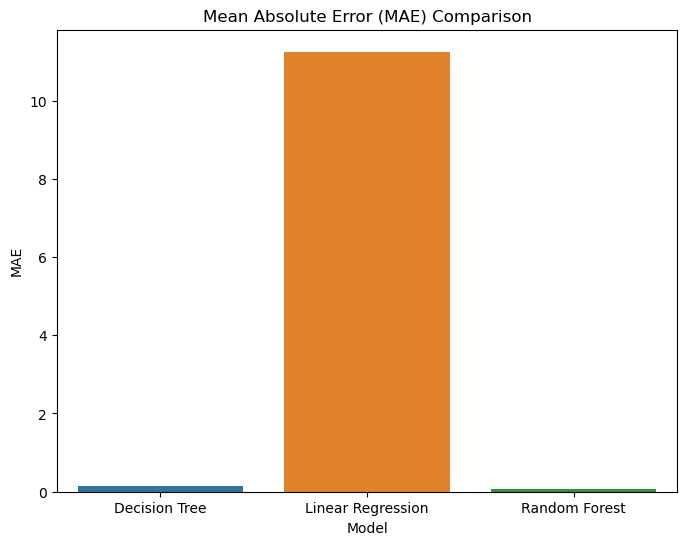

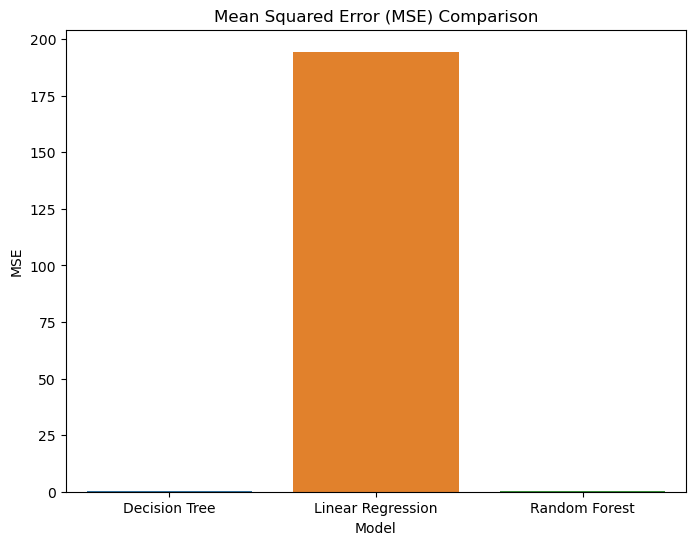

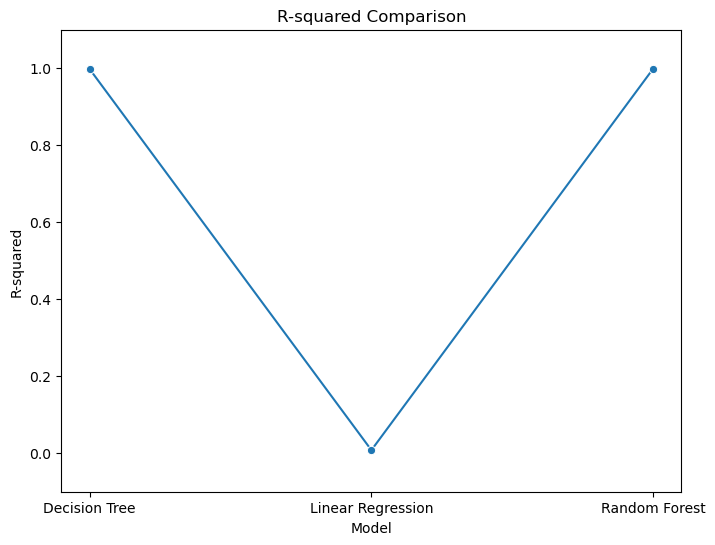

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Results data
models = ['Decision Tree', 'Linear Regression', 'Random Forest']
mae_values = [0.155, 11.248, 0.062]
mse_values = [0.308, 194.479, 0.122]
r_squared_values = [0.998, 0.008, 0.999]

# Bar chart for MAE
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=mae_values)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()

# Bar chart for MSE
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()

# Line plot for R-squared
plt.figure(figsize=(8, 6))
sns.lineplot(x=models, y=r_squared_values, marker='o')
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.ylim(-0.1, 1.1)  # Set y-axis limits to [0, 1]
plt.show()

